Compare the coadded depth for chips from different vendors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plotters

In [4]:
database = 'enigma_1189_sqlite.db'
opsdb = db.OpsimDatabase(database)
outDir = 'CoaddChips'
resultsDb = db.ResultsDb(outDir=outDir)
filters=['u','g','r','i','z','y']

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="y"
Found 446281 visits
Running:  ['opsim_CoaddM5_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="r"
Found 544710 visits
Running:  ['opsim_CoaddM5_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="g"
Found 249108 visits
Running:  ['opsim_CoaddM5_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="u"
Found 186607 visits
Running:  ['opsim_CoaddM5_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="i"
Found 545488 visits
Running:  ['opsim_CoaddM5_i_HEAL']
Completed metric generation.
Running reduce methods.
Run

Optimal bin calculation tried to make 949 bins, returning 200
Optimal bin calculation tried to make 223 bins, returning 200



Plotting figures with filter="r" sqlconstraint now.
monopole: 27.0646  dipole: lon: 88.995, lat: -64.3681, amp: 0.193735
Plotting complete.
Plotting figures with filter="g" sqlconstraint now.
monopole: 26.9505  dipole: lon: 125.62, lat: -80.5788, amp: 0.316914
Plotting complete.
Plotting figures with filter="u" sqlconstraint now.
monopole: 26.0789  dipole: lon: 105.556, lat: 17.9822, amp: 0.240981
Plotting complete.

Optimal bin calculation tried to make 844 bins, returning 200
Optimal bin calculation tried to make 260 bins, returning 200



Plotting figures with filter="i" sqlconstraint now.
monopole: 26.3991  dipole: lon: 90.5315, lat: -65.9357, amp: 0.13329
Plotting complete.
Plotting figures with filter="z" sqlconstraint now.
monopole: 25.1892  dipole: lon: 32.3207, lat: -75.0399, amp: 0.229275
Plotting complete.


Optimal bin calculation tried to make 344 bins, returning 200


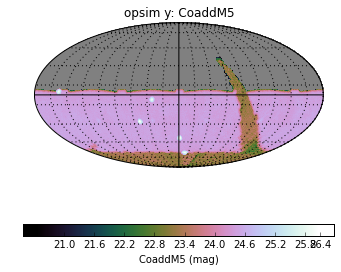

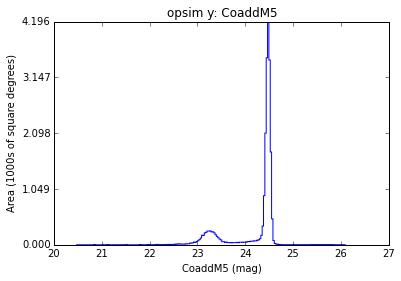

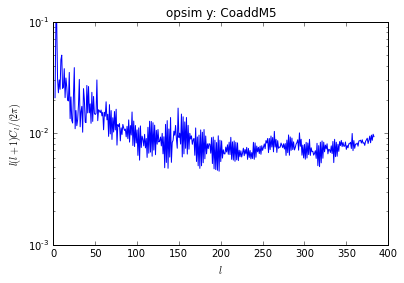

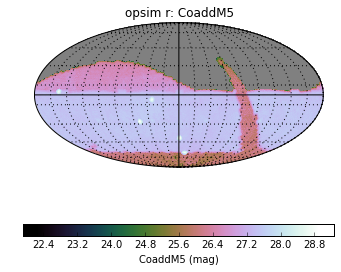

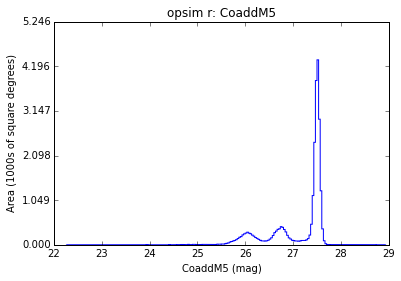

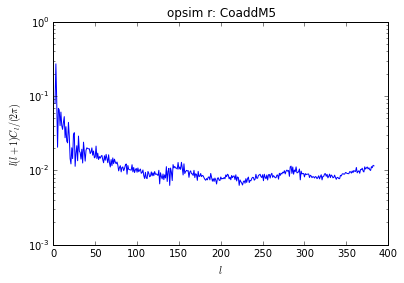

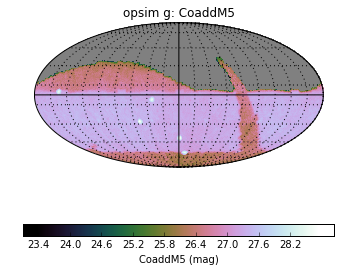

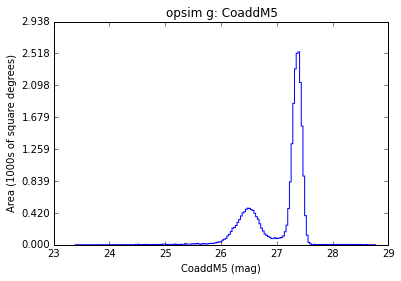

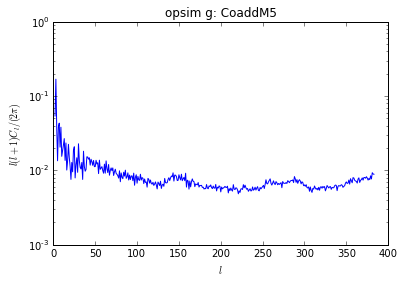

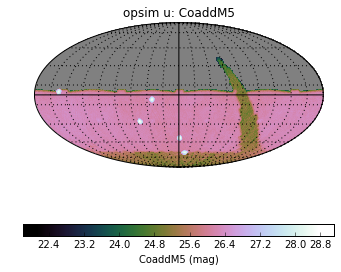

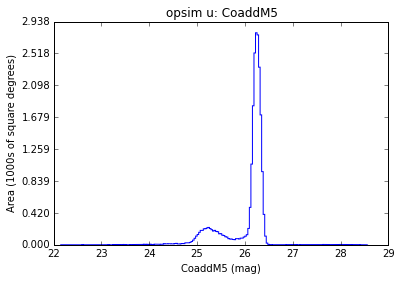

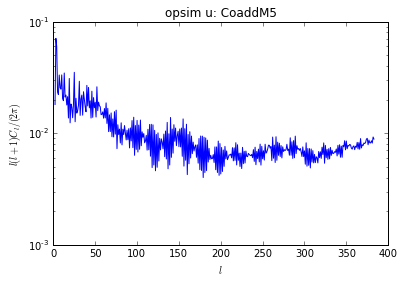

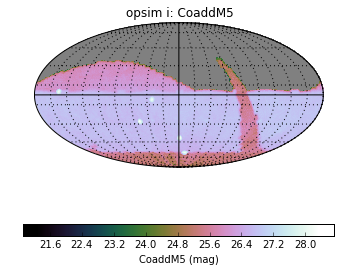

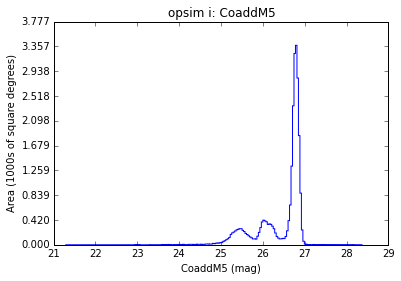

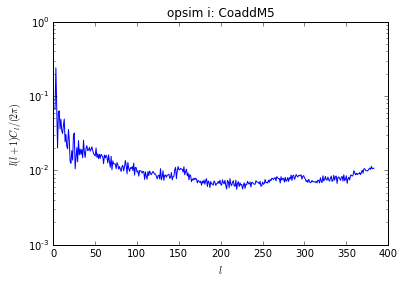

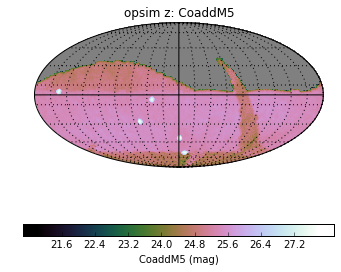

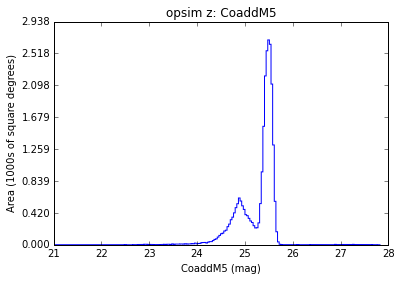

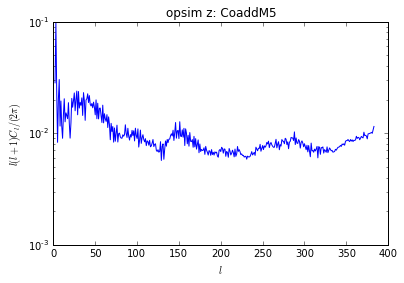

In [6]:
metric = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer(nside=128,lonCol='ditheredRA', latCol='ditheredDec')
bundleList = []
for filtName in filters:
    sql = 'filter="%s"' % filtName
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database with constraint filter="y"
Found 446281 visits
Running:  ['opsim_CoaddM5_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="r"
Found 544710 visits
Running:  ['opsim_CoaddM5_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="g"
Found 249108 visits
Running:  ['opsim_CoaddM5_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="u"
Found 186607 visits
Running:  ['opsim_CoaddM5_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="i"
Found 545488 visits
Running:  ['opsim_CoaddM5_i_HEAL']
Completed metric generation.
Running reduce methods.
Run

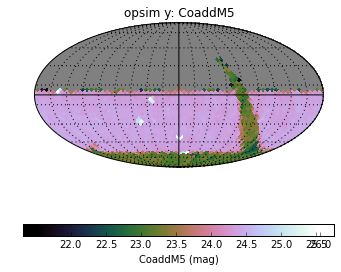

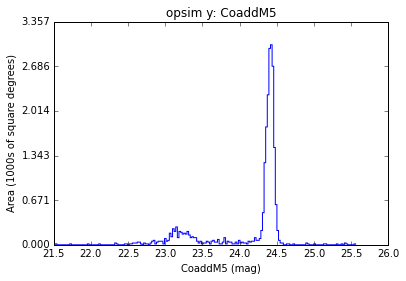

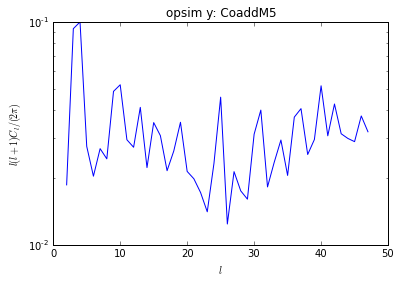

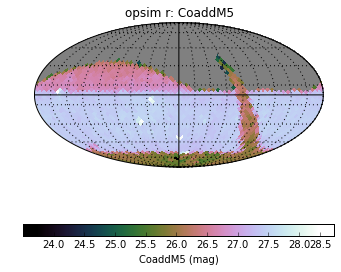

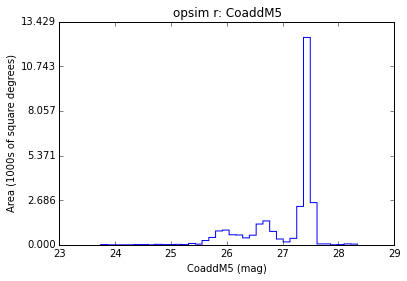

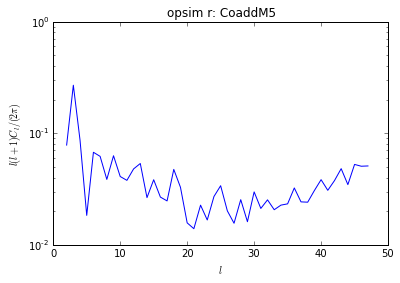

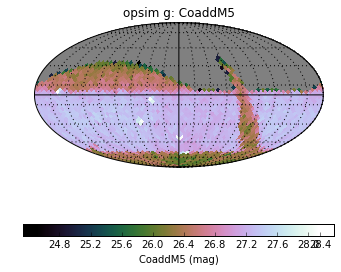

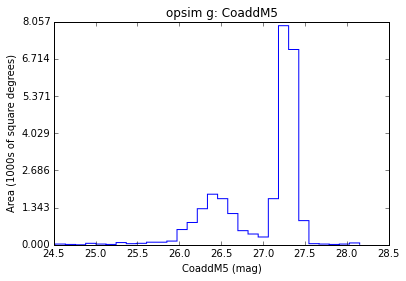

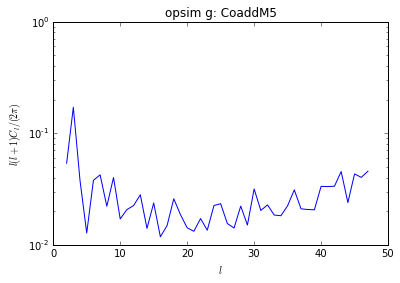

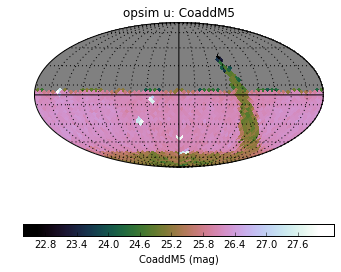

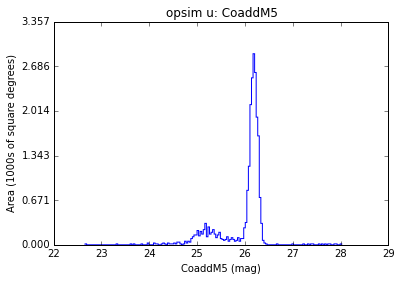

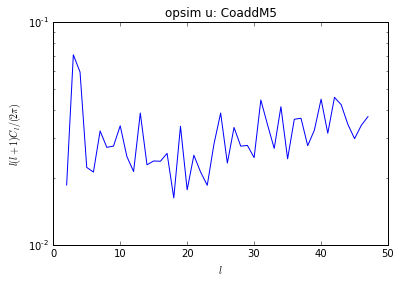

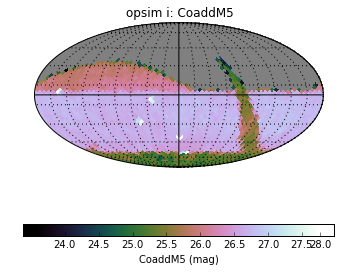

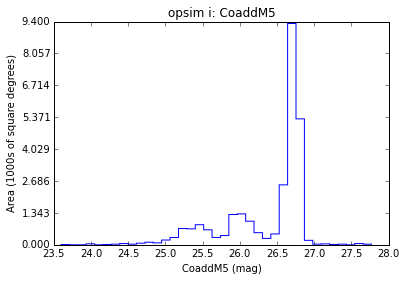

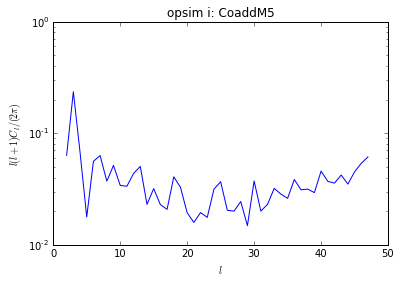

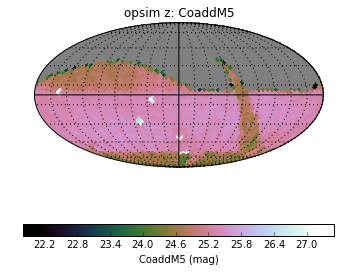

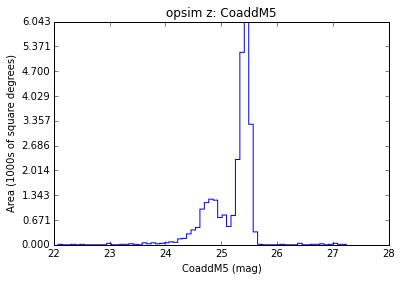

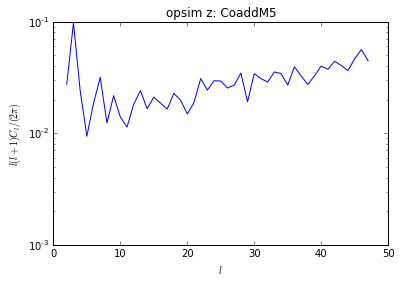

In [9]:
slicer = slicers.HealpixSlicer(nside=16,lonCol='ditheredRA', latCol='ditheredDec', useCamera=True)
bundleList = []
for filtName in filters:
    sql = 'filter="%s"' % filtName
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)